In [3]:
import pandas as pd
import numpy as np

from glob import glob

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns

mpl.style.use('seaborn-muted')
sns.set(style="whitegrid")

%matplotlib inline

In [27]:
pd.options.display.max_rows = 200

In [8]:
dfs = [
    pd.read_json(path, lines=True)
    for path in glob('../data/article-impressions.json/*.gz')
]

In [9]:
df = pd.concat(dfs)

In [13]:
len(df)

9396079

In [15]:
df.impressions.describe()

count    9.396079e+06
mean     4.065664e+05
std      3.542688e+06
min     -1.000000e+00
25%      1.030000e+03
50%      6.493000e+03
75%      5.202500e+04
max      4.059460e+09
Name: impressions, dtype: float64

In [16]:
len(df[df.impressions > 100000])

1748561

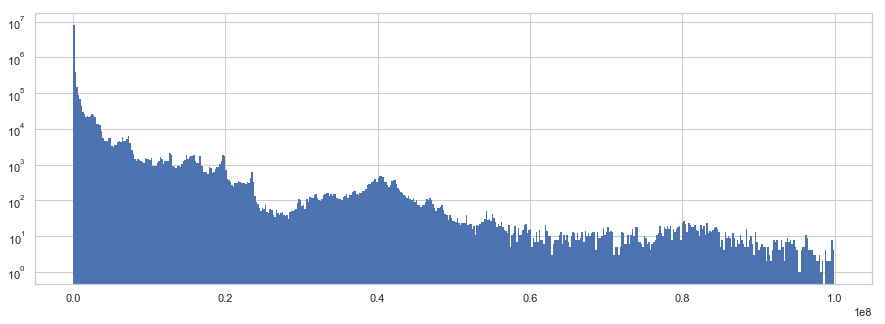

In [44]:
plt.figure(figsize=(15,5))
plt.yscale('log')
_ = plt.hist(df[df.impressions < 1e8].impressions, bins=500, linewidth=0)

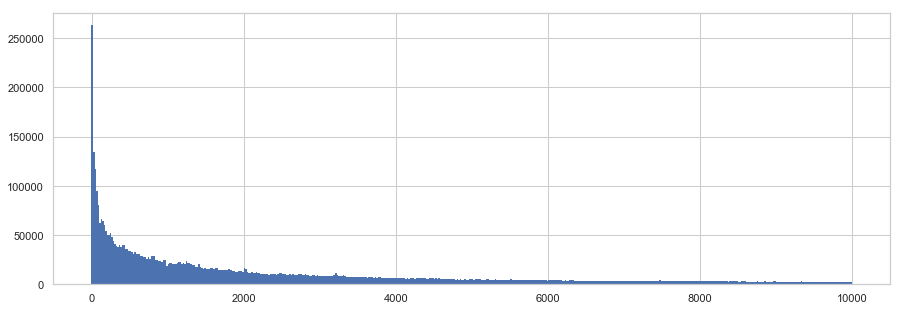

In [42]:
plt.figure(figsize=(15,5))
# plt.yscale('log')
_ = plt.hist(df[df.impressions < 1e4].impressions, bins=500, linewidth=0)

In [28]:
df.groupby('domain').count().sort_values('article_id', ascending=False)

,article_id,impressions
domain,,
yahoo.com,980919,980919
reuters.com,579502,579502
msn.com,534174,534174
bbc.co.uk,447938,447938
sputniknews.com,392360,392360
rt.com,332480,332480
nytimes.com,309458,309458
theguardian.com,293811,293811
cnn.com,263433,263433


In [40]:
df[df.impressions > 10000].groupby('domain').count().sort_values('article_id', ascending=False)

,article_id,impressions
domain,,
reuters.com,221066,221066
bbc.co.uk,208276,208276
yahoo.com,205274,205274
theguardian.com,169033,169033
rt.com,150150,150150
cnn.com,145125,145125
nytimes.com,129736,129736
sputniknews.com,127346,127346
washingtonpost.com,126540,126540
